In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_new.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/30 [==============================] - 1s 6ms/step - loss: 1.5981 - accuracy: 0.3026 - val_loss: 1.4480 - val_accuracy: 0.3384

Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 2/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.4539 - accuracy: 0.3321 - val_loss: 1.3619 - val_accuracy: 0.3982

Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 3/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.3728 - accuracy: 0.3696 - val_loss: 1.2990 - val_accuracy: 0.4174

Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.3144 - accuracy: 0.3917 - val_loss: 1.2379 - val_accuracy: 0.4421

Epoch 00004: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss: 1.2625 - accuracy:

30/30 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.7030 - val_loss: 0.3955 - val_accuracy: 0.9282

Epoch 00037: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 38/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.7129 - val_loss: 0.3945 - val_accuracy: 0.9322

Epoch 00038: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 39/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.7235 - val_loss: 0.3861 - val_accuracy: 0.9362

Epoch 00039: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 40/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.7110 - val_loss: 0.3825 - val_accuracy: 0.9393

Epoch 00040: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 41/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.7241 -

30/30 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7523 - val_loss: 0.2983 - val_accuracy: 0.9593

Epoch 00073: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 74/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7544 - val_loss: 0.3080 - val_accuracy: 0.9513

Epoch 00074: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 75/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.7597 - val_loss: 0.3022 - val_accuracy: 0.9625

Epoch 00075: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 76/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7706 - val_loss: 0.3091 - val_accuracy: 0.9545

Epoch 00076: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 77/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7645 -

30/30 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7818 - val_loss: 0.2674 - val_accuracy: 0.9617

Epoch 00109: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 110/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7677 - val_loss: 0.2673 - val_accuracy: 0.9649

Epoch 00110: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 111/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7866 - val_loss: 0.2717 - val_accuracy: 0.9617

Epoch 00111: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 112/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7805 - val_loss: 0.2609 - val_accuracy: 0.9657

Epoch 00112: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 113/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.77

30/30 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7885 - val_loss: 0.2520 - val_accuracy: 0.9593

Epoch 00145: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 146/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7935 - val_loss: 0.2439 - val_accuracy: 0.9641

Epoch 00146: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 147/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7794 - val_loss: 0.2512 - val_accuracy: 0.9617

Epoch 00147: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 148/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7829 - val_loss: 0.2579 - val_accuracy: 0.9673

Epoch 00148: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 149/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.78

30/30 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7885 - val_loss: 0.2431 - val_accuracy: 0.9665

Epoch 00181: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 182/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7930 - val_loss: 0.2384 - val_accuracy: 0.9689

Epoch 00182: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 183/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7831 - val_loss: 0.2534 - val_accuracy: 0.9657

Epoch 00183: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 184/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7956 - val_loss: 0.2462 - val_accuracy: 0.9689

Epoch 00184: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 185/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.78

30/30 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7978 - val_loss: 0.2380 - val_accuracy: 0.9673

Epoch 00217: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 218/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7946 - val_loss: 0.2393 - val_accuracy: 0.9673

Epoch 00218: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 219/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7975 - val_loss: 0.2365 - val_accuracy: 0.9689

Epoch 00219: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 220/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7930 - val_loss: 0.2329 - val_accuracy: 0.9713

Epoch 00220: saving model to model/keypoint_classifier/keypoint_classifier_new.hdf5
Epoch 221/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.79

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9713


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.6414208e-01 2.1490432e-02 1.4367387e-02 5.6317124e-16 7.8080181e-10]
0


# 混同行列

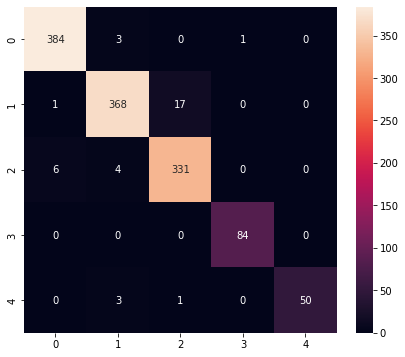

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       388
           1       0.97      0.95      0.96       386
           2       0.95      0.97      0.96       341
           3       0.99      1.00      0.99        84
           4       1.00      0.93      0.96        54

    accuracy                           0.97      1253
   macro avg       0.98      0.97      0.97      1253
weighted avg       0.97      0.97      0.97      1253



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpaydulokp/assets


6400

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 458 µs, sys: 57 µs, total: 515 µs
Wall time: 423 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6414208e-01 2.1490438e-02 1.4367373e-02 5.6317124e-16 7.8080181e-10]
0
